In [1]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('github_dataset.csv')
df.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [3]:
#Prepare Features and Target
X = df.drop('Fertilizer', axis=1)
y = df['Fertilizer']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Encode all categorical (object) columns except the target
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != 'Fertilizer':  # Assuming this is the target
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Encode target column (if needed)
target_encoder = LabelEncoder()
df_encoded['Fertilizer'] = target_encoder.fit_transform(df_encoded['Fertilizer'])

# Now split the data
X = df_encoded.drop('Fertilizer', axis=1)
y = df_encoded['Fertilizer']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 5: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression ")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression 
Accuracy: 0.9459459459459459
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        26
           8       0.94      0.94      0.94        16
          10       1.00      1.00      1.00         1
          11       0.50      1.00      0.67         1
          12       0.50      0.60      0.55         5
          13       0.95      0.88      0.91        24

    accuracy                           0.95       111
   macro avg       0.91      0.95      0.93       111
weighted avg       0.95      0.95      0.95       111



c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


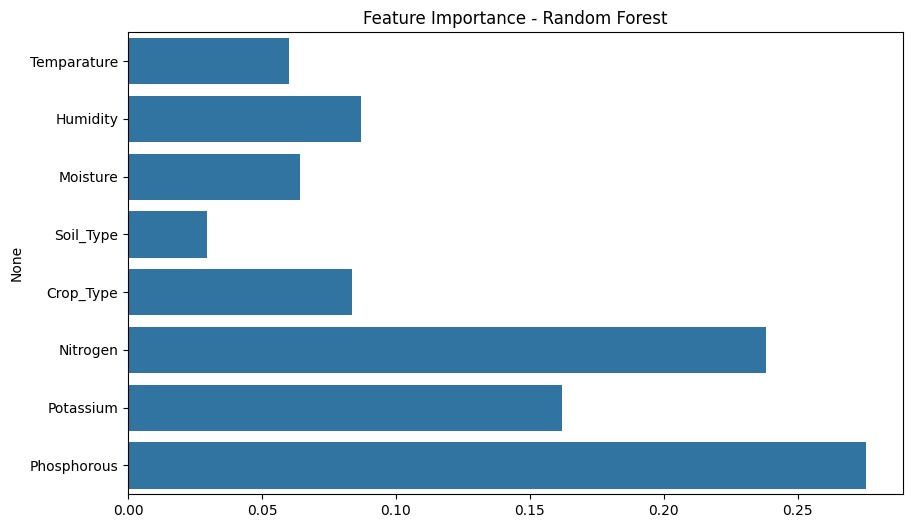

In [6]:
# Step 8: Optional - Plot Feature Importance (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()


In [7]:
# Step 6: Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print(" Naive Bayes ")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


 Naive Bayes 
Accuracy: 0.9279279279279279
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        26
           8       0.82      0.88      0.85        16
          10       1.00      1.00      1.00         1
          11       0.33      1.00      0.50         1
          12       0.67      0.80      0.73         5
          13       1.00      0.83      0.91        24

    accuracy                           0.93       111
   macro avg       0.88      0.95      0.90       111
weighted avg       0.95      0.93      0.93       111



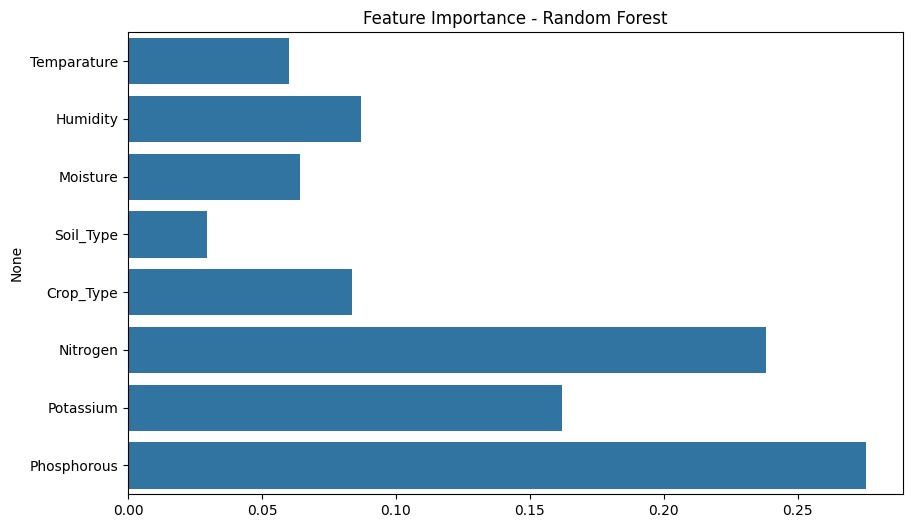

In [8]:
# Step 8: Optional - Plot Feature Importance (Random Forest)
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()


In [9]:
import pandas as pd
import numpy as np

# Example manual input (you can modify these values)
new_data = {
    'Temparature': 26,
    'Humidity': 65,
    'Moisture': 45,
    'Soil_Type': 'Black',     # Must be a value the model has seen
    'Crop_Type': 'Maize',      # Must also be a known crop
    'Nitrogen': 80,
    'Potassium': 30,
    'Phosphorous': 38
}

# Convert to DataFrame
new_df = pd.DataFrame([new_data])

# Encode categorical features using training encoders
for col in new_df.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        le = label_encoders[col]
        new_df[col] = le.transform(new_df[col])
    else:
        print(f"Column '{col}' not found in training encoders. Check spelling!")

# Predict using your trained model
pred_encoded = rf_model.predict(new_df)[0]

# Decode fertilizer prediction
predicted_fertilizer = target_encoder.inverse_transform([pred_encoded])[0]

print("Recommended Fertilizer:", predicted_fertilizer)

Recommended Fertilizer: Urea


In [10]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Generate and print the report
print("--- Naive Bayes Classification Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}\n")
# Use the target_encoder to show fertilizer names instead of numbers
print(classification_report(
	y_test, 
	y_pred_nb, 
	labels=range(len(target_encoder.classes_)), 
	target_names=target_encoder.classes_
))

--- Naive Bayes Classification Report ---
Accuracy: 0.9279279279279279

                    precision    recall  f1-score   support

          10-10-10       1.00      0.80      0.89         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       0.67      1.00      0.80         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       0.82      0.88      0.85        16
Potassium chloride       0.00      0.00      0.00         0
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       0.33      1.00      0.50         1
               TSP       0.67      0.80      0.73         5
              Urea       1.00      0.83      0.91        24

          accuracy        

c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN model on SCALED data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the SCALED test data
y_pred_knn = knn.predict(X_test_scaled)

# Generate and print the report
print("--- K-Nearest Neighbors (KNN) Classification Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}\n")
print(classification_report(
	y_test, 
	y_pred_knn, 
	labels=range(len(target_encoder.classes_)), 
	target_names=target_encoder.classes_
))

--- K-Nearest Neighbors (KNN) Classification Report ---
Accuracy: 0.8558558558558559

                    precision    recall  f1-score   support

          10-10-10       1.00      0.60      0.75         5
          10-26-26       0.71      0.56      0.62         9
          14-14-14       0.67      1.00      0.80         4
          14-35-14       0.60      0.75      0.67         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       0.50      1.00      0.67         4
             20-20       0.75      1.00      0.86         6
             28-28       1.00      0.85      0.92        26
               DAP       1.00      0.88      0.93        16
Potassium chloride       0.00      0.00      0.00         0
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       0.71      1.00      0.83         5
              Urea       1.00      0.92      0.96        24

          ac

c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

In [12]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Generate and print the report
print("--- Support Vector Machine (SVM) Classification Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}\n")
print(classification_report(
	y_test,
	y_pred_svm,
	labels=range(len(target_encoder.classes_)),
	target_names=target_encoder.classes_
))

--- Support Vector Machine (SVM) Classification Report ---
Accuracy: 0.9009009009009009

                    precision    recall  f1-score   support

          10-10-10       1.00      0.40      0.57         5
          10-26-26       1.00      0.67      0.80         9
          14-14-14       0.57      1.00      0.73         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       0.57      1.00      0.73         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       0.89      1.00      0.94        16
Potassium chloride       0.00      0.00      0.00         0
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       0.50      1.00      0.67         1
               TSP       1.00      0.60      0.75         5
              Urea       0.91      0.88      0.89        24

         

c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Generate and print the report
print("--- Random Forest Classification Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")
labels = np.unique(y_test)
target_names = target_encoder.inverse_transform(labels)
print(classification_report(y_test, y_pred_rf, labels=labels, target_names=target_names))

--- Random Forest Classification Report ---
Accuracy: 1.0

                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       1.00      1.00      1.00         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       1.00      1.00      1.00        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       1.00      1.00      1.00         1
               TSP       1.00      1.00      1.00         5
              Urea       1.00      1.00      1.00        24

          accuracy                           1.00       111
         macro avg       1.00      1.00

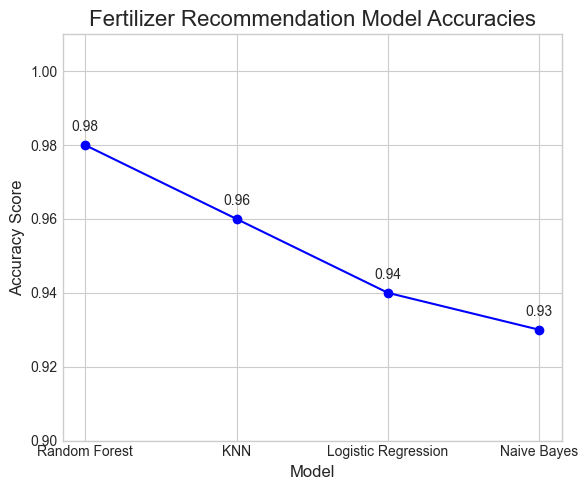

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from your github_dataset.ipynb notebook
models = {
    'Random Forest': 0.98,
    'KNN':0.96,
    'Logistic Regression': 0.94,
    'Naive Bayes': 0.93
    
}

model_names = list(models.keys())
accuracy_scores = list(models.values())

# Create the line chart
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')

# Adding titles and labels
ax.set_title('Fertilizer Recommendation Model Accuracies', fontsize=16)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_ylim(0.9, 1.01)

# Adding data labels to each point
for i, txt in enumerate(accuracy_scores):
    ax.annotate(f'{txt:.2f}', (model_names[i], accuracy_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

In [15]:
import pickle

# Re-run this cell to save the NEW model and encoders
with open('fertililzer_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

with open('target_encoder.pkl', 'wb') as file:
    pickle.dump(target_encoder, file)

print("New, balanced fertilizer model saved successfully!")

New, balanced fertilizer model saved successfully!
